# LIS Data Visualization
- Data provided by Sujay Kumar's group. Metadata located [here](http://himat.org/team-documents/data-access/land-information-system/)
- In ADAPT Data are located at `/att/pubrepo/hma_data/products/LIS/SURFACEMODEL/`

In [1]:
# Import the necessary libraries
%matplotlib inline
import os
import sys

import xarray as xr

from dask.diagnostics import ProgressBar

import seaborn as sb

import matplotlib.pyplot as plt

import cartopy.crs as ccrs
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter

sys.path.append('../../scripts/')
from LIS import utils
from tools import animation_tools

#### Define the main data directory

In [2]:
datadir = '/att/pubrepo/hma_data/products/LIS/SURFACEMODEL'

#### Create an xarray dataset. This uses mf_dataset to read all NetCDF files into one dataset. Our utility also modifies the data to get longitude and latitude into the coordinate structure.

In [3]:
%time ds = utils.get_xr_dataset(datadir, multiple_nc=True)

CPU times: user 7min 44s, sys: 23.1 s, total: 8min 7s
Wall time: 12min 10s


### Look at the contents of the dataset

In [11]:
ds['Qsm_tavg'][0,0:2,0].values.sum()

nan

### For every variable we can look at the attributes to see the long name, units, etc.

In [6]:
ds['Snowf_tavg'].attrs

OrderedDict([('units', 'kg m-2 s-1'),
             ('standard_name', 'snowfall_rate'),
             ('long_name', 'snowfall rate'),
             ('vmin', 0.0),
             ('vmax', 0.0)])

## Make a static plot using cartopy

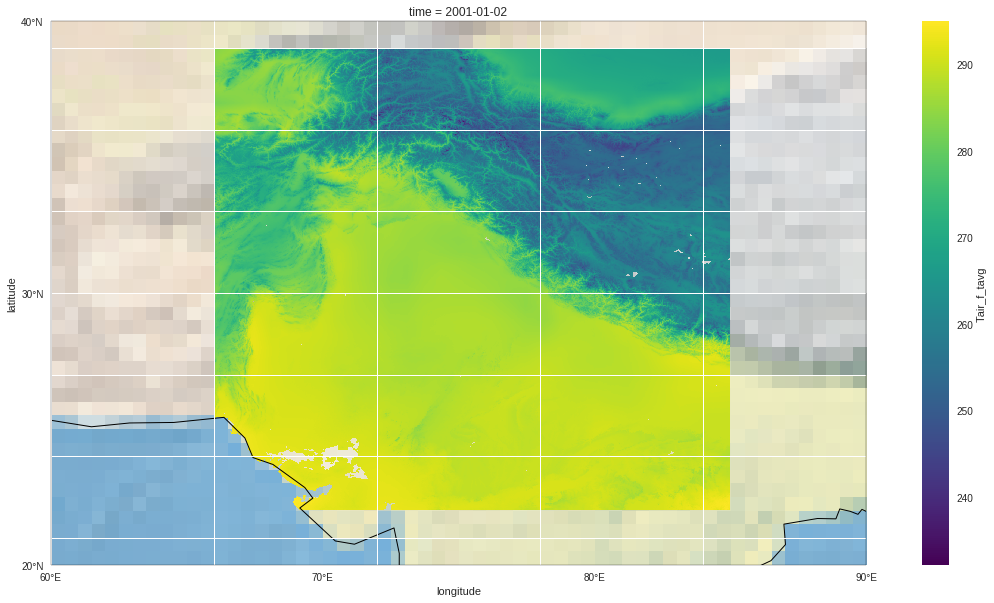

In [5]:
# Set up cartopy axes
fig = plt.figure(figsize=(20,10))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_global()
ax.stock_img()
from cartopy import config
# get the path to an image (in this case, a stock image which ships with cartopy)
fname = os.path.join(config["repo_data_dir"],
                     'raster', 'natural_earth', '50-natural-earth-1-downsampled.png')
img = imread(fname)
ax.imshow(img, origin='upper', transform=ccrs.PlateCarree(), extent=[-180, 180, -90, 90])


ax.gridlines()
ax.coastlines()
ax.set_ylim([20,40])
ax.set_xlim([60,90])
ax.set_yticks([20, 30, 40], crs=ccrs.PlateCarree())
ax.set_xticks([60, 70, 80, 90], crs=ccrs.PlateCarree())
lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)

# Plot the data of first timestamp only (This is for multiple data)
ds.Tair_f_tavg[1,:,:].plot.pcolormesh(ax=ax, transform=ccrs.PlateCarree(), x='longitude', y='latitude', add_colorbar=True)

### Question: what is the mean air temperature across the domain for the entire time period?

* use xarray's groupby functionality

[########################################] | 100% Completed | 23min 54.3s


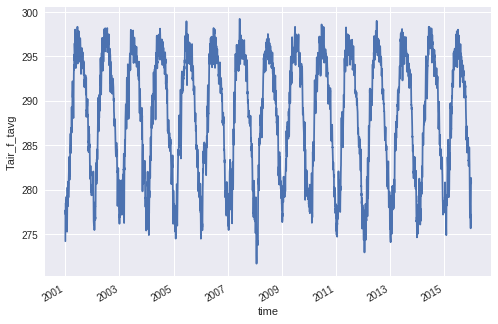

In [ ]:
with ProgressBar():
    ds['Tair_f_tavg'].groupby('time').mean().plot()

### Now try calculating the total swe across the region:

[########################################] | 100% Completed | 18min 40.3s


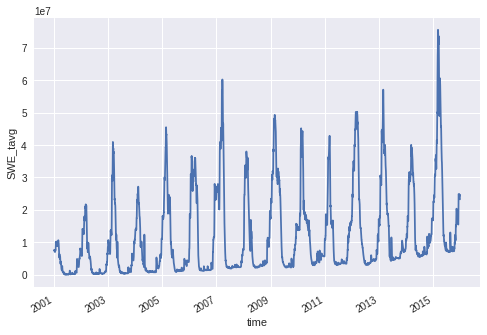

In [4]:
with ProgressBar():
    ds['SWE_tavg'].groupby('time').sum().plot()